In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/description.pdf
/kaggle/input/diabetes/diabetic_data.csv


# Imposting Necssary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display

# Attributes Description :
# Data Set Description


**VARIABLE NAMES**: DESCRIPTION

* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










In [3]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

In [4]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

In [5]:
#SevenSigma(df)

# Let's Handle Missing Values

In [6]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)

In [7]:
df['race']=df['race'].apply(lambda x : 'Other' if x=='?' else x)

In [8]:
df.drop(index=[30506, 75551, 82573],inplace=True)

In [9]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature


In [10]:
df['age']=replace_age_ranges(df['age'])

In [11]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,1,6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,2,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,3,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,4,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,5,1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [13]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [14]:
df['gender']=df['gender'].apply(lambda x: 0 if x=='Female' else 1)

In [15]:
medicine=list(df.columns)

In [16]:
medicine=medicine[17:40]

In [17]:
for col in medicine:
    df[col]=df[col].apply(lambda x : 0 if x=='No' else 1)

In [18]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0,1,6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,Caucasian,0,2,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,>30
2,AfricanAmerican,0,3,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,Caucasian,1,4,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO
4,Caucasian,1,5,1,1,7,1,51,0,8,0,0,0,197,157,250,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO


In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in ['race','diag_1','diag_2','diag_3']:
    df[col]=le.fit_transform(df[col])

In [20]:
df['age']=df['age'].apply(lambda x :int(x))

In [61]:
X=df[['discharge_disposition_id', 'diag_1', 'diag_2', 'num_lab_procedures',
       'diag_3', 'number_inpatient', 'num_medications', 'age',
       'time_in_hospital', 'admission_source_id', 'number_diagnoses',
       'num_procedures', 'admission_type_id', 'race', 'number_emergency',
       'number_outpatient', 'gender', 'insulin', 'metformin', 'diabetesMed',
       'change', 'glipizide', 'rosiglitazone', 'glyburide', 'pioglitazone']]
y=df['readmitted']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
'''from sklearn.ensemble import RandomForestClassifier
model0=RandomForestClassifier()

model0.fit(X_train,y_train)'''

'from sklearn.ensemble import RandomForestClassifier\nmodel0=RandomForestClassifier()\n\nmodel0.fit(X_train,y_train)'

In [24]:
'''from sklearn.metrics import accuracy_score, precision_recall_fscore_support

y_true=y_test
y_pred=model0.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision) 
print("Recall:", recall)
print("F1 Score:", fscore)'''

'from sklearn.metrics import accuracy_score, precision_recall_fscore_support\n\ny_true=y_test\ny_pred=model0.predict(X_test)\n\n# Calculate metrics\naccuracy = accuracy_score(y_true, y_pred)\nprecision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average=\'macro\')\n\nprint("Accuracy:", accuracy)\nprint("Precision:", precision) \nprint("Recall:", recall)\nprint("F1 Score:", fscore)'

In [25]:
'''import optuna
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import RandomForestClassifier

# Objective function
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 100, 1500)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    max_features = trial.suggest_uniform("max_features", 0.01, 1.0)
    
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5) 
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])

    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,  
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 criterion=criterion)

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    return cv_scores.mean()


   '''

'import optuna\nfrom sklearn.model_selection import cross_val_score  \nfrom sklearn.ensemble import RandomForestClassifier\n\n# Objective function\ndef objective(trial):\n\n    n_estimators = trial.suggest_int("n_estimators", 100, 1500)\n    max_depth = trial.suggest_int("max_depth", 3, 15)\n    max_features = trial.suggest_uniform("max_features", 0.01, 1.0)\n    \n    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)\n    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5) \n    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])\n\n    clf = RandomForestClassifier(n_estimators=n_estimators,\n                                 max_depth=max_depth,\n                                 max_features=max_features,  \n                                 min_samples_split=min_samples_split,\n                                 min_samples_leaf=min_samples_leaf,\n                                 criterion=criterion)\n\n    cv_scores = cross_val_score(clf, 

In [26]:
'''study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_trial.params)'''

'study = optuna.create_study(direction="maximize")\nstudy.optimize(objective, n_trials=100)\n\nprint(study.best_trial.params)'

In [27]:
from sklearn.metrics import f1_score

In [64]:
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False,
        task_type = 'GPU'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred,average='micro')

In [29]:
import optuna
from optuna.samplers import TPESampler
import catboost

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [34]:
study.best_trial

FrozenTrial(number=53, state=TrialState.COMPLETE, values=[0.5974214850045203], datetime_start=datetime.datetime(2024, 1, 16, 12, 20, 31, 795090), datetime_complete=datetime.datetime(2024, 1, 16, 12, 20, 37, 195702), params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1000, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.001, step=None), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'l2_leaf_reg': FloatDistribution(high=100.0, log=True, low=1e-08, step=None), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian',)), 'random_strength': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'bagging_tempe

In [36]:
params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}

In [40]:
model=catboost.CatBoostClassifier(**params,task_type='GPU',verbose=False)

In [41]:
model.fit(X_train,y_train)

In [42]:
y_pred=model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <30       0.44      0.03      0.06      2870
         >30       0.52      0.40      0.46      8882
          NO       0.63      0.84      0.72     13689

    accuracy                           0.60     25441
   macro avg       0.53      0.43      0.41     25441
weighted avg       0.57      0.60      0.55     25441



Text(0.5, 1.0, 'Feature Importance')

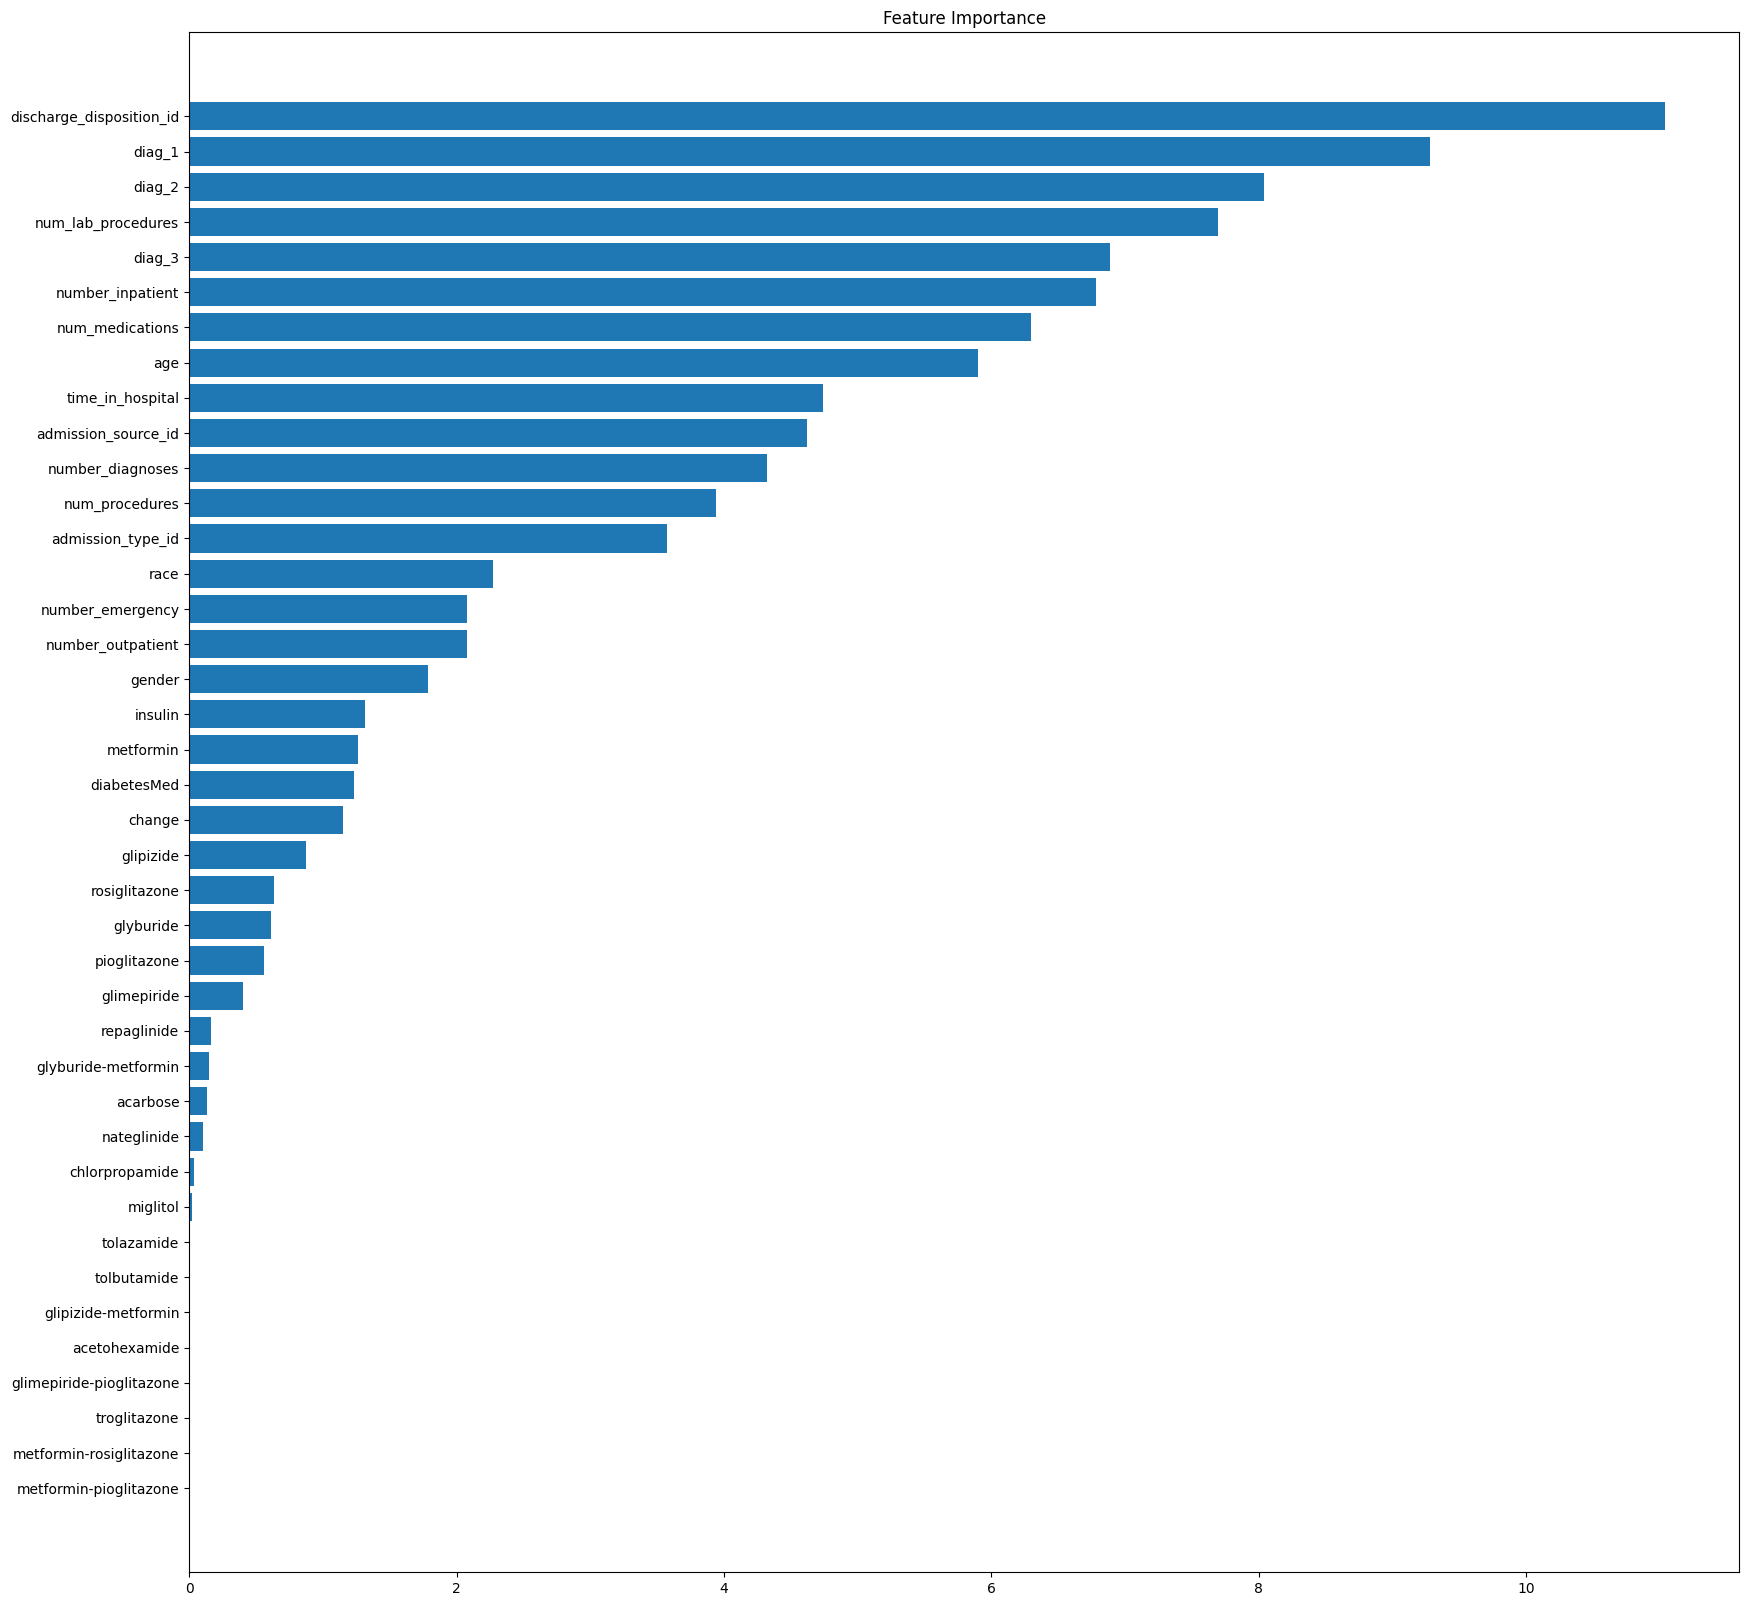

In [47]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [48]:
sorted_idx

array([37, 36, 30, 35, 22, 34, 25, 31, 29, 20, 19, 28, 33, 18, 21, 26, 24,
       27, 23, 38, 39, 17, 32,  1, 10, 11,  0,  3,  8, 16,  5,  6,  2,  9,
       12, 15,  7, 14, 13,  4])

In [60]:
X_test.columns[sorted_idx[:25]]

Index(['discharge_disposition_id', 'diag_1', 'diag_2', 'num_lab_procedures',
       'diag_3', 'number_inpatient', 'num_medications', 'age',
       'time_in_hospital', 'admission_source_id', 'number_diagnoses',
       'num_procedures', 'admission_type_id', 'race', 'number_emergency',
       'number_outpatient', 'gender', 'insulin', 'metformin', 'diabetesMed',
       'change', 'glipizide', 'rosiglitazone', 'glyburide', 'pioglitazone'],
      dtype='object')

In [58]:
sorted_idx=sorted_idx[::-1]